# 必要なライブラリをimprot

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [63]:
sample_size = (12, 8, 10)
lambda_param = 500

# 評価に必要な定数の定義

In [64]:
shot_num = 1000
res = dict(naive=[], arranged=[], equal=[])
positive_num = []

In [65]:
for _ in range(shot_num):
    arr = np.random.exponential(scale=1/lambda_param, size=(12, 8, 10))
    
    rand = np.random.rand(12, 8, 10)
    samples = rand < arr
    
    # positiveの(x, y, z)を取得
    indices = np.nonzero(samples)
    positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]
    
    # positiveになる層のindexを取得
    c_x = np.where(np.any(samples, axis = (1, 2)))[0].tolist()
    c_y = np.where(np.any(samples, axis = (0, 2)))[0].tolist()
    c_z = np.where(np.any(samples, axis = (0, 1)))[0].tolist()
    retest = len(c_x) * len(c_y) * len(c_z)
    
    # better_Arrangement
    sorted_arr = np.flip(np.sort(np.sort(arr.reshape(1, 960)).reshape(10,8,12).T, axis = 0).reshape(12, 8, 10))
    arranged_rand = np.zeros(sample_size)
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            for k in range(sample_size[2]):
                loc = np.where(sorted_arr == arr[i][j][k])
                x, y, z = loc[0][0], loc[1][0], loc[2][0]
                arranged_rand[x][y][z] = rand[i][j][k]
    
    arranged_samples = arranged_rand < sorted_arr
    indices = np.nonzero(arranged_samples)
    arranged_positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]
    
    c_x = np.where(np.any(arranged_samples, axis = (1, 2)))[0].tolist()
    c_y = np.where(np.any(arranged_samples, axis = (0, 2)))[0].tolist()
    c_z = np.where(np.any(arranged_samples, axis = (0, 1)))[0].tolist()
    arranged_retest = len(c_x) * len(c_y) * len(c_z)

    if retest > arranged_retest:
        # d['arranged'] += 1
        res['arranged'].append(arranged_retest)
    elif retest < arranged_retest:
        res['naive'].append(retest)
    else:
        res['equal'].append(arranged_retest)

    positive_num.append(len(positives))

res_value = [len(res['naive']), len(res['arranged']), len(res['equal'])]

Text(0.5, 1.0, 'Number of times that fewer inspections could be performed by comparing naive and arrangement(1000shots)')

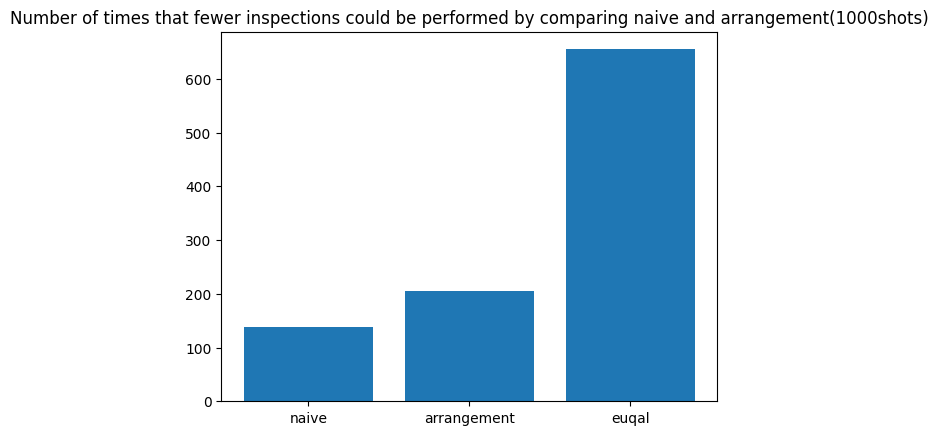

In [66]:
fig, ax = plt.subplots()
ax.bar(['naive', 'arrangement', 'euqal'], res_value)
ax.set_title(f'Number of times that fewer inspections could be performed by comparing naive and arrangement({shot_num}shots)')

In [67]:
sum(positive_num)/shot_num

1.86